In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

## Importing booksummaries.xlsx

In [2]:
data = pd.read_excel('booksummaries.xlsx',engine='openpyxl')

In [3]:
data

,Title,Author,Summary
0,Animal Farm,George Orwell,"Old Major, the old boar on the Manor Farm, ca..."
1,A Clockwork Orange,Anthony Burgess,"Alex, a teenager living in near-future Englan..."
2,The Plague,Albert Camus,The text of The Plague is divided into five p...
3,An Enquiry Concerning Human Understanding,David Hume,The argument of the Enquiry proceeds by a ser...
4,A Fire Upon the Deep,Vernor Vinge,The novel posits that space around the Milky ...
...,...,...,...
95,The Book of the City of Ladies,NaN,Part I opens with Christine reading from Math...
96,The Sentinel,Arthur C. Clarke,The story deals with the discovery of an arti...
97,The Fountains of Paradise,Arthur C. Clarke,"In the 22nd century, Dr Vannevar Morgan is a ..."
98,Lord of the Flies,William Golding,"In the midst of a wartime evacuation, a Briti..."


#  a)Shakespeare works

In [4]:
data[data['Author'] == 'William Shakespeare']

,Title,Author,Summary
43,Hamlet,William Shakespeare,The protagonist of Hamlet is Prince Hamlet of...
51,Macbeth,William Shakespeare,"The play opens amidst thunder and lightning, ..."
59,Othello,William Shakespeare,"The play opens with Roderigo, a rich and diss..."
68,Romeo and Juliet,William Shakespeare,"The play, set in Verona, begins with a street..."


In [5]:
shakespeare_works = [summary for summary in data[data['Author'] == 'William Shakespeare']['Summary']]

In [6]:
from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [7]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

We remove the above stop words from the corpus

In [8]:
words = []
for summary in shakespeare_works:
    raw_words = word_tokenize(summary)
    for item in raw_words:
        if item.isalpha():
            item=item.lower()
            if item not in stop_words:
                words.append(item)

In [9]:
len(words)

2427

In [10]:
from collections import Counter

In [11]:
Counter(words).most_common()[:50]

[('hamlet', 57),
 ('macbeth', 54),
 ('iago', 32),
 ('othello', 32),
 ('cassio', 30),
 ('desdemona', 23),
 ('romeo', 23),
 ('claudius', 21),
 ('macduff', 19),
 ('king', 18),
 ('laertes', 15),
 ('lady', 15),
 ('ghost', 14),
 ('death', 14),
 ('juliet', 14),
 ('witches', 13),
 ('banquo', 13),
 ('prince', 11),
 ('gertrude', 11),
 ('father', 11),
 ('polonius', 11),
 ('ophelia', 11),
 ('two', 11),
 ('kill', 11),
 ('duncan', 11),
 ('capulet', 11),
 ('night', 10),
 ('murder', 10),
 ('arrives', 10),
 ('roderigo', 10),
 ('tells', 9),
 ('paris', 9),
 ('castle', 8),
 ('horatio', 8),
 ('england', 8),
 ('poisoned', 8),
 ('thane', 8),
 ('emilia', 8),
 ('son', 7),
 ('wife', 7),
 ('one', 7),
 ('dead', 7),
 ('prophecy', 7),
 ('malcolm', 7),
 ('brabantio', 7),
 ('handkerchief', 7),
 ('enters', 6),
 ('however', 6),
 ('play', 6),
 ('scene', 6)]

The top 50 words occuring in the corpus with their respective counts.

# b)K-Means Clustering

#### A Tf-ifd word-frequency array

We will create word frequency array for the summary documents.For this , we will use TfidfVectorizer from sklearn.It transform a list of documents into a word frequency array, which it outputs as a csr_matric,

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
documents=[]
for items in data.Summary:
    documents.append(items)

In [14]:
documents

[' Old Major, the old boar on the Manor Farm, calls the animals on the farm for a meeting, where he compares the humans to parasites and teaches the animals a revolutionary song, \'Beasts of England\'. When Major dies, two young pigs, Snowball and Napoleon, assume command and turn his dream into a philosophy. The animals revolt and drive the drunken and irresponsible Mr Jones from the farm, renaming it "Animal Farm". They adopt Seven Commandments of Animal-ism, the most important of which is, "All animals are equal". Snowball attempts to teach the animals reading and writing; food is plentiful, and the farm runs smoothly. The pigs elevate themselves to positions of leadership and set aside special food items, ostensibly for their personal health. Napoleon takes the pups from the farm dogs and trains them privately. Napoleon and Snowball struggle for leadership. When Snowball announces his plans to build a windmill, Napoleon has his dogs chase Snowball away and declares himself leader. 

In [15]:
tfidf=TfidfVectorizer()

csr_mat = tfidf.fit_transform(documents)

In [16]:
print(csr_mat.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

['00', '000', '10', '100', '1000', '108', '11', '12', '120', '13', '14', '15', '16', '1600', '1698', '16a', '16b', '17', '1757', '1761', '1799', '18', '1806', '1807', '1824', '1835', '1845', '1851', '1853', '1860s', '1861', '1863', '1864', '1865', '1869', '1873', '1877', '1880', '1883', '19', '1941', '1942', '1947', '1953', '1959', '1961', '1962', '1965', '1970s', '1971', '1974', '1976', '1979', '1980s', '1987', '1990s', '1997', '1998', '19th', '20', '2001', '2009', '200th', '2010', '2011', '204', '2077', '20th', '21', '2130', '217', '21st', '22', '2248', '22nd', '23', '24', '25', '26', '27', '2702', '28', '2850', '29', '30', '300', '31', '317', '319', '32', '320', '321', '322', '324', '328', '330', '332', '34', '340', '346', '348', '35', '353', '354', '355', '356', '359', '360', '361', '362', '38', '384', '385', '389', '390', '391', '392', '393', '398', '3jane', '40', '400', '402', '408', '41', '412', '414', '42', '425', '426', '439', '44', '49', '493', '50', '500', '500m', '550', '58

In [18]:
csr_mat.toarray().shape

(100, 11581)

In [19]:
idf_score = tfidf.idf_ 
feature = tfidf.get_feature_names()

In [20]:
feature

['00',
 '000',
 '10',
 '100',
 '1000',
 '108',
 '11',
 '12',
 '120',
 '13',
 '14',
 '15',
 '16',
 '1600',
 '1698',
 '16a',
 '16b',
 '17',
 '1757',
 '1761',
 '1799',
 '18',
 '1806',
 '1807',
 '1824',
 '1835',
 '1845',
 '1851',
 '1853',
 '1860s',
 '1861',
 '1863',
 '1864',
 '1865',
 '1869',
 '1873',
 '1877',
 '1880',
 '1883',
 '19',
 '1941',
 '1942',
 '1947',
 '1953',
 '1959',
 '1961',
 '1962',
 '1965',
 '1970s',
 '1971',
 '1974',
 '1976',
 '1979',
 '1980s',
 '1987',
 '1990s',
 '1997',
 '1998',
 '19th',
 '20',
 '2001',
 '2009',
 '200th',
 '2010',
 '2011',
 '204',
 '2077',
 '20th',
 '21',
 '2130',
 '217',
 '21st',
 '22',
 '2248',
 '22nd',
 '23',
 '24',
 '25',
 '26',
 '27',
 '2702',
 '28',
 '2850',
 '29',
 '30',
 '300',
 '31',
 '317',
 '319',
 '32',
 '320',
 '321',
 '322',
 '324',
 '328',
 '330',
 '332',
 '34',
 '340',
 '346',
 '348',
 '35',
 '353',
 '354',
 '355',
 '356',
 '359',
 '360',
 '361',
 '362',
 '38',
 '384',
 '385',
 '389',
 '390',
 '391',
 '392',
 '393',
 '398',
 '3jane',
 '40'

In [21]:
idf_score

array([4.92197334, 3.66921037, 3.31253542, ..., 4.92197334, 4.92197334,
       4.92197334])

### k-means clustering after using feature decomposition TruncatedSVD

In [22]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=100)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters = 6,random_state=7)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd,kmeans)

In [23]:
# Fit the pipeline to articles
pipeline.fit(csr_mat)

# Calculate the cluster labels: labels
labels = pipeline.predict(csr_mat)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'Title': data.Title})

# Display df sorted by cluster label
print(df.sort_values('label'))

    label                      Title
27      0                Don Quixote
57      0                    No Logo
29      0               Dune Messiah
30      0    Darwin's Dangerous Idea
31      0            Death of a Hero
..    ...                        ...
53      5   Moby-Dick; or, The Whale
68      5           Romeo and Juliet
70      5                  Ringworld
36      5        Farmer Giles of Ham
99      5  Through the Looking-Glass

[100 rows x 2 columns]


In [24]:
df.label.value_counts()

0    35
5    24
4    24
1    12
3     3
2     2
Name: label, dtype: int64

### K-means clustering directly of dataset  

In [25]:
clusters_model=[]
inertia_val=[]

for cluster in range(2,20):
    # Creating a KMeans instance: kmeans
    kmeans = KMeans(n_clusters = cluster,random_state=7)
    kmeans.fit(csr_mat)
    # Calculate the cluster labels: labels
    labels = kmeans.predict(csr_mat)
    inertia_val.append(kmeans.inertia_)
    #print(cluster)
    clusters_model.append(kmeans)
    # Create a DataFrame aligning labels and titles: df
    df = pd.DataFrame({'label': labels, 'Title': data.Title})

    # Display df sorted by cluster label
    #print(df.sort_values('label'))

In [26]:
clusters_model

[KMeans(n_clusters=2, random_state=7),
 KMeans(n_clusters=3, random_state=7),
 KMeans(n_clusters=4, random_state=7),
 KMeans(n_clusters=5, random_state=7),
 KMeans(n_clusters=6, random_state=7),
 KMeans(n_clusters=7, random_state=7),
 KMeans(random_state=7),
 KMeans(n_clusters=9, random_state=7),
 KMeans(n_clusters=10, random_state=7),
 KMeans(n_clusters=11, random_state=7),
 KMeans(n_clusters=12, random_state=7),
 KMeans(n_clusters=13, random_state=7),
 KMeans(n_clusters=14, random_state=7),
 KMeans(n_clusters=15, random_state=7),
 KMeans(n_clusters=16, random_state=7),
 KMeans(n_clusters=17, random_state=7),
 KMeans(n_clusters=18, random_state=7),
 KMeans(n_clusters=19, random_state=7)]

In [27]:
len(clusters_model)

18

In [28]:
len(range(1,20))

19

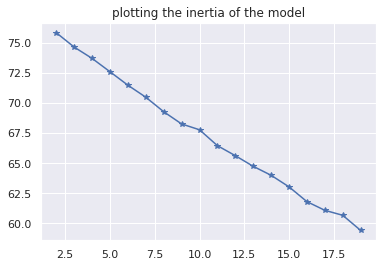

In [29]:
# plot the inertia vs K values
plt.plot(range(2,20),inertia_val,marker='*')
plt.title("plotting the inertia of the model")
#plt.xbin(range(1,20))
plt.show()

## Silhouette Score

In [30]:
from sklearn.metrics import silhouette_score

In [31]:
from sklearn.metrics import silhouette_score
silhouette=[]
for i in range(2,20):
    print("---------------------------------------")
    print(clusters_model[i-2])
    print("Silhouette score:",silhouette_score(csr_mat, clusters_model[i-2].predict(csr_mat)))
    silhouette.append(silhouette_score(csr_mat, clusters_model[i-2].predict(csr_mat)))

---------------------------------------
KMeans(n_clusters=2, random_state=7)
Silhouette score: 0.003980645428074023
---------------------------------------
KMeans(n_clusters=3, random_state=7)
Silhouette score: 0.008547677009335801
---------------------------------------
KMeans(n_clusters=4, random_state=7)
Silhouette score: 0.011813650160863276
---------------------------------------
KMeans(n_clusters=5, random_state=7)
Silhouette score: -0.006011890823033612
---------------------------------------
KMeans(n_clusters=6, random_state=7)
Silhouette score: 0.006081294837022173
---------------------------------------
KMeans(n_clusters=7, random_state=7)
Silhouette score: -0.006706976268347563
---------------------------------------
KMeans(random_state=7)
Silhouette score: 0.008693330612183216
---------------------------------------
KMeans(n_clusters=9, random_state=7)
Silhouette score: 0.013064690943175106
---------------------------------------
KMeans(n_clusters=10, random_state=7)
Silhou

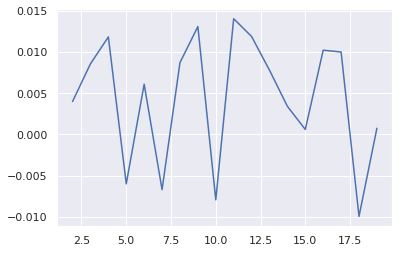

In [32]:
plt.plot(range(2,20),silhouette)

## Taking the optimal Silhouette Score for n_cluster

In [33]:
kmeans = KMeans(n_clusters = 15,random_state=7)
kmeans.fit(csr_mat)
# Calculate the cluster labels: labels
labels = kmeans.predict(csr_mat)
inertia_val.append(kmeans.inertia_)
clusters_model.append(kmeans)
# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'Title': data.Title})

# Display df sorted by cluster label
print(df.sort_values('label'))

    label                                Title
9       0    Blade Runner 2: The Edge of Human
8       0      Blade Runner 3: Replicant Night
69      1  Rosencrantz & Guildenstern Are Dead
43      1                               Hamlet
81      2                  The Shockwave Rider
..    ...                                  ...
66     11                            Pale Fire
82     12                          The Shining
76     13      Sir Gawain and the Green Knight
4      14                 A Fire Upon the Deep
70     14                            Ringworld

[100 rows x 2 columns]


In [34]:
df.label.value_counts()

2     60
7     18
8      3
14     2
10     2
6      2
5      2
4      2
1      2
0      2
13     1
12     1
11     1
9      1
3      1
Name: label, dtype: int64

# c)Topic modelling

### NMF

In [35]:
from sklearn.decomposition import NMF

In [36]:
tfidf=TfidfVectorizer(stop_words='english')

csr_mat = tfidf.fit_transform(documents)

#tfidf.get_feature_names()

In [54]:
# Applying Non-Negative Matrix Factorization
 
nmf = NMF(n_components=10)
model = nmf.fit_transform(csr_mat)
#features = nmf.components_

/home/mamba/.local/lib/python3.6/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


In [55]:
csr_mat.shape

(100, 11293)

In [56]:
model.shape

(100, 10)

In [57]:
features = nmf.components_
features.shape

(10, 11293)

In [58]:
df_model=pd.DataFrame(model , index=data.Title)

In [59]:
df_model

,0,1,2,3,4,5,6,7,8,9
Title,,,,,,,,,,
Animal Farm,0.067972,0.036829,0.000910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A Clockwork Orange,0.066471,0.000000,0.003015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000984
The Plague,0.104777,0.027176,0.001477,0.000000,0.000000,0.004372,0.011090,0.000000,0.002565,0.000000
An Enquiry Concerning Human Understanding,0.095291,0.019419,0.000000,0.000000,0.000000,0.000000,0.004106,0.000000,0.000000,0.000000
A Fire Upon the Deep,0.050426,0.000000,0.035407,0.000000,0.004871,0.001215,0.134252,0.000000,0.009813,0.000000
...,...,...,...,...,...,...,...,...,...,...
The Book of the City of Ladies,0.065920,0.000000,0.000000,0.000000,0.000000,0.000000,0.003701,0.043037,0.000000,0.000000
The Sentinel,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.527199,0.000000,0.000000,0.000000
The Fountains of Paradise,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.449174,0.000000,0.006993,0.007271


In [67]:
df_model.loc['Romeo and Juliet']

0    0.054230
1    0.000000
2    0.000000
3    0.022461
4    0.000000
5    0.000000
6    0.000000
7    0.000000
8    0.000000
9    0.000000
Name: Romeo and Juliet, dtype: float64

In [66]:
df_model.loc['Macbeth']

0    0.057225
1    0.004191
2    0.025525
3    0.040752
4    0.017024
5    0.000000
6    0.000000
7    0.016545
8    0.000933
9    0.000000
Name: Macbeth, dtype: float64

So, we can see both Hamlet and Macbeth has NMF feature 0 with the highest value.

In [68]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(nmf.components_, columns=tfidf.get_feature_names())
# Select row 3: component
component = components_df.iloc[0]
# Print result of nlargest
print(component.nlargest(20))

war           0.419809
george        0.271580
john          0.211639
town          0.207284
mr            0.206947
hume          0.187243
family        0.182923
montag        0.177766
book          0.171121
life          0.168770
father        0.164082
don           0.162470
man           0.161683
case          0.161422
clausewitz    0.160331
elizabeth     0.160100
gregor        0.158947
king          0.156957
tells         0.156823
lady          0.156360
Name: 0, dtype: float64


In [69]:
components_df

,00,000,10,100,1000,108,11,12,120,13,...,zerubbabel,zeus,zim,zion,zone,zones,zophar,zouch,ægidius,æsir
0,0.00915,0.005351,0.007569,0.002917,0.015059,0.002616,0.018517,0.009659,0.000000,0.000000,...,0.000000,0.013078,0.021488,0.000000,0.021557,0.016088,0.001165,0.004718,0.000114,0.024658
1,0.00000,0.031687,0.035388,0.000088,0.000000,0.000214,0.035013,0.067866,0.012258,0.020257,...,0.000000,0.001069,0.000201,0.021986,0.000000,0.000000,0.009791,0.000000,0.000000,0.000000
2,0.00000,0.000759,0.000796,0.000000,0.000000,0.000000,0.000036,0.000000,0.000333,0.000022,...,0.000000,0.000000,0.001180,0.000000,0.004607,0.000737,0.000000,0.000254,0.000000,0.000000
3,0.00000,0.000000,0.000000,0.000000,0.001852,0.000014,0.000000,0.000094,0.000000,0.000737,...,0.000000,0.000071,0.000000,0.000000,0.000000,0.000000,0.000000,0.000495,0.000610,0.002524
4,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.00000,0.000000,0.000000,0.000370,0.000000,0.000000,0.000354,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.001349,0.000052,0.000000,0.003073,0.000000,0.000000,0.000930,0.000000
6,0.00000,0.007336,0.002056,0.006080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.021651,0.005091,0.000000,0.000000,0.000000,0.000000
7,0.00000,0.000000,0.062340,0.000037,0.006780,0.000000,0.009900,0.000000,0.000000,0.018119,...,0.174981,0.000000,0.000000,0.053763,0.000000,0.000132,0.000000,0.000470,0.002128,0.015221
8,0.00000,0.000000,0.000000,0.000000,0.000000,0.000013,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000064,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015195,0.000000
9,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [70]:
for topic in range(components_df.shape[0]):
    tmp = components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(20))
    print('\n')

For topic 1 the words with the highest value are:
war           0.419809
george        0.271580
john          0.211639
town          0.207284
mr            0.206947
hume          0.187243
family        0.182923
montag        0.177766
book          0.171121
life          0.168770
father        0.164082
don           0.162470
man           0.161683
case          0.161422
clausewitz    0.160331
elizabeth     0.160100
gregor        0.158947
king          0.156957
tells         0.156823
lady          0.156360
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
god           0.597334
moses         0.398327
israel        0.220418
israelites    0.212155
chapters      0.155516
land          0.153552
yahweh        0.145595
jonah         0.134843
joshua        0.134523
job           0.108429
aaron         0.107239
hosea         0.107118
covenant      0.103798
egypt         0.103101
people        0.096980
abraham       0.092522
mountain      0.088673
chapter       0.088661
